In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from collections import defaultdict

df = pd.read_excel("D:\\LLM interns\\Questions\\test.xlsx")

In [2]:
df.head(25)

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",2011-10-23,eric.bass@enron.com
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,2010-04-05,kayne.coulter@enron.com
7,Forgot the Attachment,Please print attachment and make sure that e:m...,2010-04-21,patti.thompson@enron.com
8,Garvin Brown - AXIA Sr. Power Scheduler,Please advise me of your interest in Garvin's ...,2010-02-07,sally.beck@enron.com
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2010-02-06,kayne.coulter@enron.com


In [3]:
df = df.dropna(subset=['body','date','from'])
df = df[df['body'].str.strip() != '']

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

In [5]:
df = df.drop_duplicates(subset=['from', 'date', 'body'])

In [6]:
def clean_message(text):
    text = str(text).lower()                    # lowercase
    text = re.sub(r'[\r\n\t]+', ' ', text)      # remove newlines, tabs
    text = re.sub(r'http\S+', '', text)         # remove URLs
    text = re.sub(r'[^\w\s]', '', text)         # remove punctuation
    text = re.sub(r'\s+', ' ', text)            # normalize whitespace
    return text.strip()

In [7]:
df['cleaned_message'] = df['body'].apply(clean_message)

In [8]:
df['word_count'] = df['cleaned_message'].str.split().str.len()
df['char_count'] = df['cleaned_message'].str.len()

In [9]:
df.to_excel("D:\\LLM interns\\Questions\\cleaned_dataset.xlsx", index=False)

print("Cleaned dataset saved as 'cleaned_dataset.xlsx'")

Cleaned dataset saved as 'cleaned_dataset.xlsx'


In [10]:
df = pd.read_excel("D:\\LLM interns\\Questions\\cleaned_dataset.xlsx")

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
def get_sentiment(text):
    if not isinstance(text, str):  
        return "Neutral"  
    
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [13]:
df['sentiment_label'] = df['cleaned_message'].apply(get_sentiment)

df.to_excel("D:\\LLM interns\\Questions\\labeled_messages.xlsx", index=False)
print("Sentiment-labeled data ready!")

Sentiment-labeled data ready!


In [14]:

####EDA Exploratory data analyis######

In [15]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [16]:
df = pd.read_excel("D:\\LLM interns\\Questions\\labeled_messages.xlsx")

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [17]:

print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Subject          2161 non-null   object        
 1   body             2161 non-null   object        
 2   date             2161 non-null   datetime64[ns]
 3   from             2161 non-null   object        
 4   cleaned_message  2116 non-null   object        
 5   word_count       2161 non-null   int64         
 6   char_count       2161 non-null   int64         
 7   sentiment_label  2161 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 135.2+ KB
None

Missing Values:
Subject             0
body                0
date                0
from                0
cleaned_message    45
word_count          0
char_count          0
sentiment_label     0
dtype: int64


In [18]:
# Show first few rows
df.head()

,Subject,body,date,from,cleaned_message,word_count,char_count,sentiment_label
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,enronoptions announcement we have updated the ...,99,637,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,marc unfortunately today is not going to work ...,54,290,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,when wednesday june 06 2001 1000 am1100 am gmt...,18,102,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,we were thinking papasitos we can meet somewhe...,24,139,Neutral
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,since you never gave me the 20 for the last ti...,42,188,Positive


In [19]:

###EDA part 2##

In [20]:
sentiment_counts = df['sentiment_label'].value_counts()

C:\Users\swarn\AppData\Local\Temp\ipykernel_15056\760795376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')


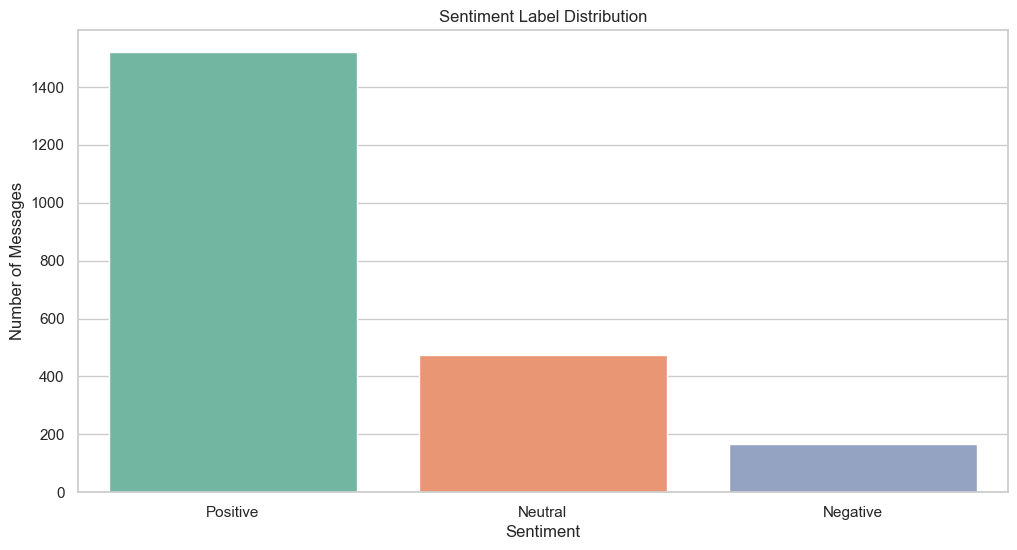

In [21]:
sns.countplot(x='sentiment_label', data=df, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.show()

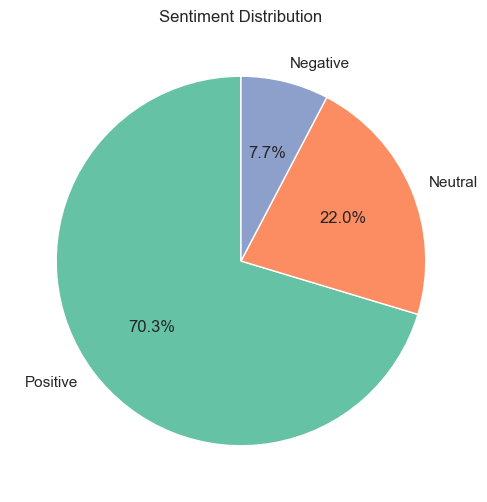

In [22]:
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

In [23]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['month'] = df['date'].dt.to_period('M')

monthly_trend = df.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)

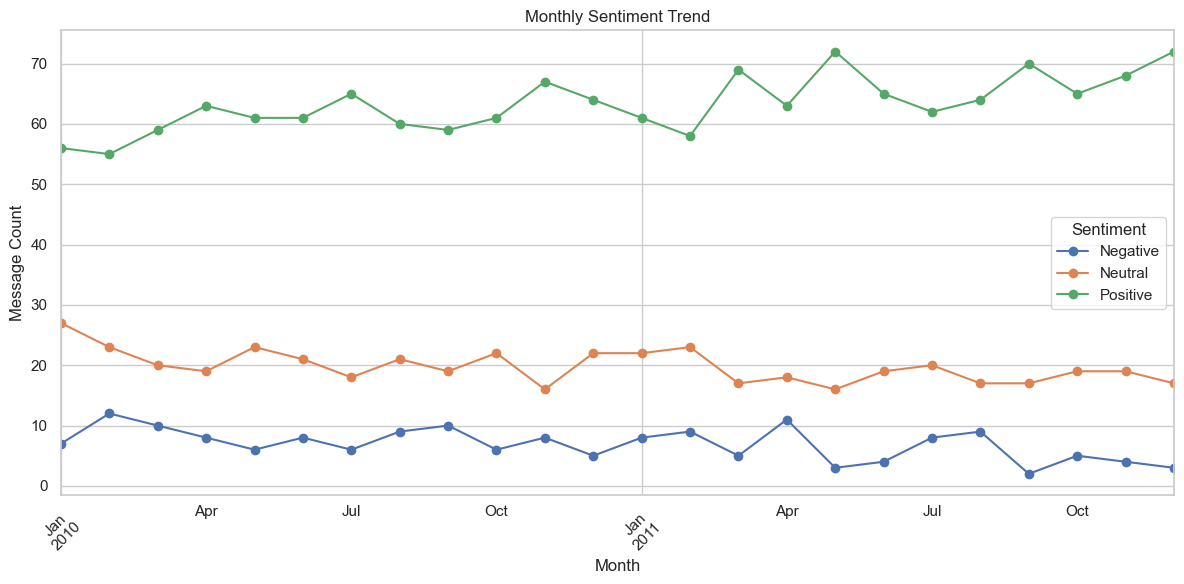

In [24]:
monthly_trend.plot(marker='o')
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

C:\Users\swarn\AppData\Local\Temp\ipykernel_15056\4088575565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_senders.index, x=top_senders.values, palette="coolwarm")


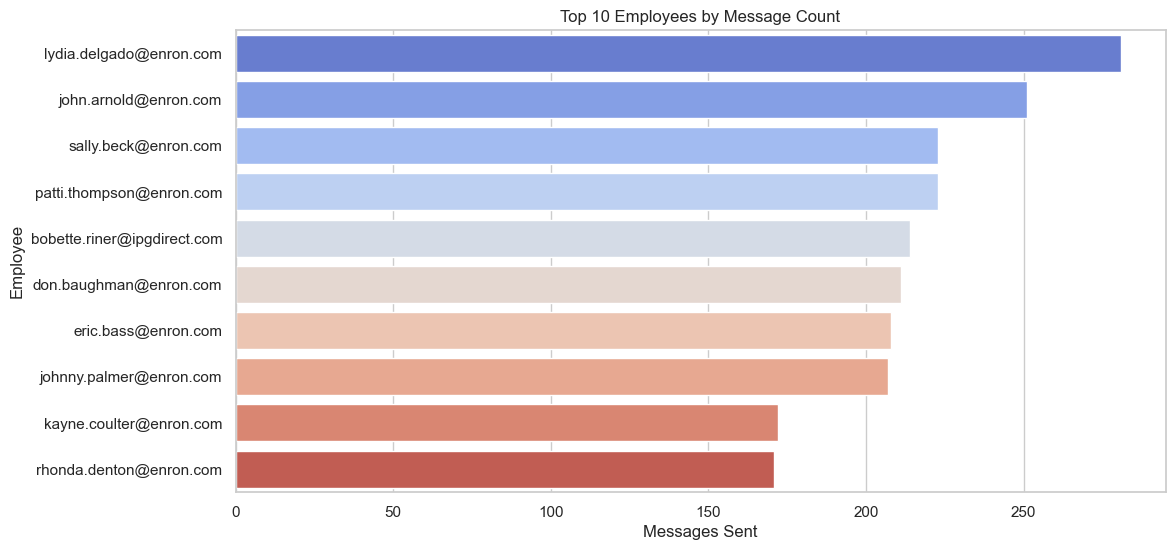

In [25]:
# Top 10 employees by message count
top_senders = df['from'].value_counts().head(10)

sns.barplot(y=top_senders.index, x=top_senders.values, palette="coolwarm")
plt.title("Top 10 Employees by Message Count")
plt.xlabel("Messages Sent")
plt.ylabel("Employee")
plt.show()

In [26]:
# Group by employee + sentiment
employee_sentiment = df.groupby(['from', 'sentiment_label']).size().unstack(fill_value=0)

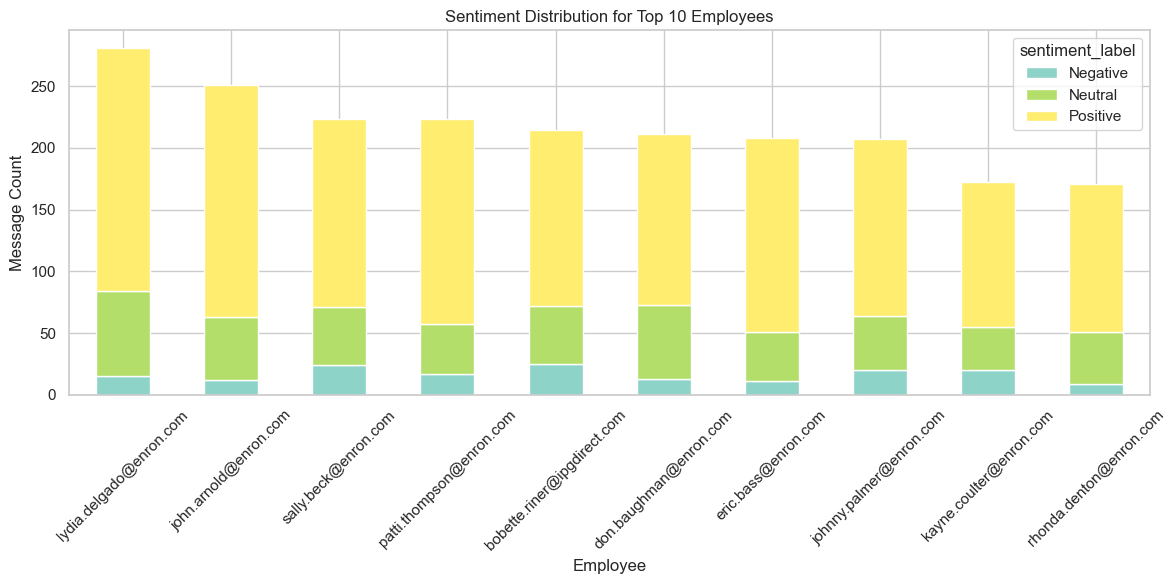

In [27]:
top10_emps = top_senders.index
employee_sentiment.loc[top10_emps].plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Sentiment Distribution for Top 10 Employees")
plt.xlabel("Employee")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

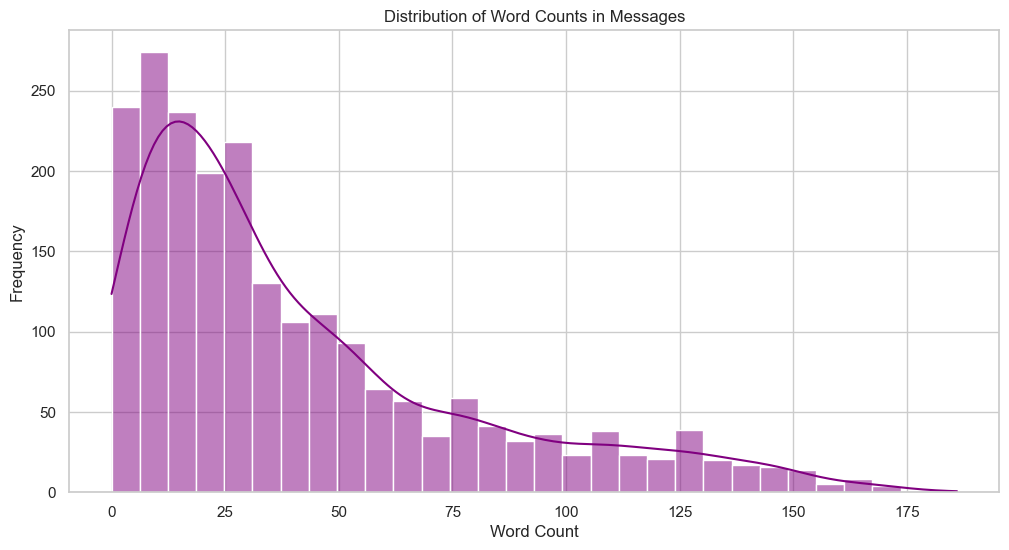

In [28]:
sns.histplot(df['word_count'], bins=30, kde=True, color='purple')
plt.title("Distribution of Word Counts in Messages")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [29]:
###Task 3: Employee Score Calculation###

In [30]:
sentiment_score_map={
    'Positive':1,
    'Neutral':0,
    'Negative':-1
}
df['sentiment_score']=df['sentiment_label'].map(sentiment_score_map)

In [31]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [32]:
df['month'] = df['date'].dt.to_period('M')

In [33]:
#putting groupby method

In [34]:
monthly_scores=df.groupby(['from', 'month'])['sentiment_score'].sum().reset_index()

In [35]:
monthly_scores.columns=['employee','month','monthly_sentiment_score']
monthly_scores=monthly_scores.sort_values(['employee','month'])

In [36]:
print(monthly_scores.head(50))

                       employee    month  monthly_sentiment_score
0   bobette.riner@ipgdirect.com  2010-01                        1
1   bobette.riner@ipgdirect.com  2010-02                        7
2   bobette.riner@ipgdirect.com  2010-03                        6
3   bobette.riner@ipgdirect.com  2010-04                        4
4   bobette.riner@ipgdirect.com  2010-05                        2
5   bobette.riner@ipgdirect.com  2010-06                        2
6   bobette.riner@ipgdirect.com  2010-07                        8
7   bobette.riner@ipgdirect.com  2010-08                        4
8   bobette.riner@ipgdirect.com  2010-09                        3
9   bobette.riner@ipgdirect.com  2010-10                        6
10  bobette.riner@ipgdirect.com  2010-11                        6
11  bobette.riner@ipgdirect.com  2010-12                        4
12  bobette.riner@ipgdirect.com  2011-01                        7
13  bobette.riner@ipgdirect.com  2011-02                        2
14  bobett

In [37]:
monthly_scores.to_excel("D:\\LLM interns\\Questions\\monthly_employee_sentiment_scores.xlsx", index=False)
print("Saved monthly scores to 'monthly_employee_sentiment_scores.xlsx'")

Saved monthly scores to 'monthly_employee_sentiment_scores.xlsx'


In [38]:
#TOP 3 positive
top_positive=(
    monthly_scores
    .sort_values(['month','monthly_sentiment_score','employee'],ascending=[True,False,True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)

top_positive['rank_type']='Top Positive'

In [39]:
top_negative = (
    monthly_scores
    .sort_values(['month', 'monthly_sentiment_score', 'employee'], ascending=[True, True, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)

top_negative['rank_type'] = 'Top Negative'

In [40]:
employee_ranking = pd.concat([top_positive, top_negative], ignore_index=True)

employee_ranking = employee_ranking.sort_values(['month', 'rank_type', 'monthly_sentiment_score'], ascending=[True, True, False])

print(employee_ranking.head(10))

                       employee    month  monthly_sentiment_score  \
72  bobette.riner@ipgdirect.com  2010-01                        1   
73      johnny.palmer@enron.com  2010-01                        1   
74      rhonda.denton@enron.com  2010-01                        1   
0       kayne.coulter@enron.com  2010-01                       11   
1           eric.bass@enron.com  2010-01                        9   
2       lydia.delgado@enron.com  2010-01                        9   
76      lydia.delgado@enron.com  2010-02                        1   
77     patti.thompson@enron.com  2010-02                        1   
75      kayne.coulter@enron.com  2010-02                       -1   
3         john.arnold@enron.com  2010-02                       11   

       rank_type  
72  Top Negative  
73  Top Negative  
74  Top Negative  
0   Top Positive  
1   Top Positive  
2   Top Positive  
76  Top Negative  
77  Top Negative  
75  Top Negative  
3   Top Positive  


In [41]:
employee_ranking.to_excel("D:\\LLM interns\\Questions\\employee_monthly_ranking.xlsx", index=False)
print("Saved employee rankings to 'employee_monthly_ranking.xlsx")

Saved employee rankings to 'employee_monthly_ranking.xlsx


In [42]:
#  Flight Risk Identification

In [43]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

neg_df = df[df['sentiment_label'] == 'Negative'].copy()

neg_df.sort_values(['from', 'date'], inplace=True)

In [44]:
#rolling 30 day count per employee

In [45]:
flight_risks = set()

for emp, group in neg_df.groupby('from'):
    dates = group['date'].dropna().sort_values().reset_index(drop=True)

    for i in range(len(dates)):
        start_date = dates[i]
        window_end = start_date + pd.Timedelta(days=30)
        count_in_window = dates[(dates >= start_date) & (dates <= window_end)].count()

        if count_in_window >= 4:
            flight_risks.add(emp)
            break  

In [46]:
flight_risk_df = pd.DataFrame({'employee': list(flight_risks)})
print("Flight Risk Employees:")
print(flight_risk_df)

flight_risk_df.to_excel("D:\\LLM interns\\Questions\\flight_risk_employees.xlsx", index=False)
print("Saved flight risk list to 'flight_risk_employees.xlsx'")

Flight Risk Employees:
                      employee
0        john.arnold@enron.com
1      kayne.coulter@enron.com
2         sally.beck@enron.com
3      johnny.palmer@enron.com
4     patti.thompson@enron.com
5  bobette.riner@ipgdirect.com
Saved flight risk list to 'flight_risk_employees.xlsx'


In [47]:
#Predict Sentiment Score Trends

In [48]:
monthly_features = df.groupby(['from', df['date'].dt.to_period('M')]).agg({
    'cleaned_message': 'count',                 
    'word_count': ['sum', 'mean'],              
    'sentiment_score': 'sum'                    
}).reset_index()

monthly_features.columns = ['employee', 'month', 'message_count', 'total_word_count', 'avg_word_count', 'sentiment_score']

monthly_features.dropna(inplace=True)

In [49]:
X = monthly_features[['message_count', 'total_word_count', 'avg_word_count']]
y = monthly_features['sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#training
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [51]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f" R² Score: {r2:.3f}")
print(f" RMSE: {rmse:.3f}")

 R² Score: 0.617
 RMSE: 1.977


In [52]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Linear Regression Coefficients:")
print(coeff_df)

Linear Regression Coefficients:
            Feature  Coefficient
0     message_count     0.599073
1  total_word_count     0.000907
2    avg_word_count     0.006202
